In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from scipy.signal import find_peaks

pF = np.arange(1,7)
E = [-546, -487, -427, -368, -343, -395]
pF = pF[::-1]
E = E[::-1]

E_ions = [-285, -320, -329, -369, -429, -485]
E_ions[::-1]



[-485, -429, -369, -329, -320, -285]

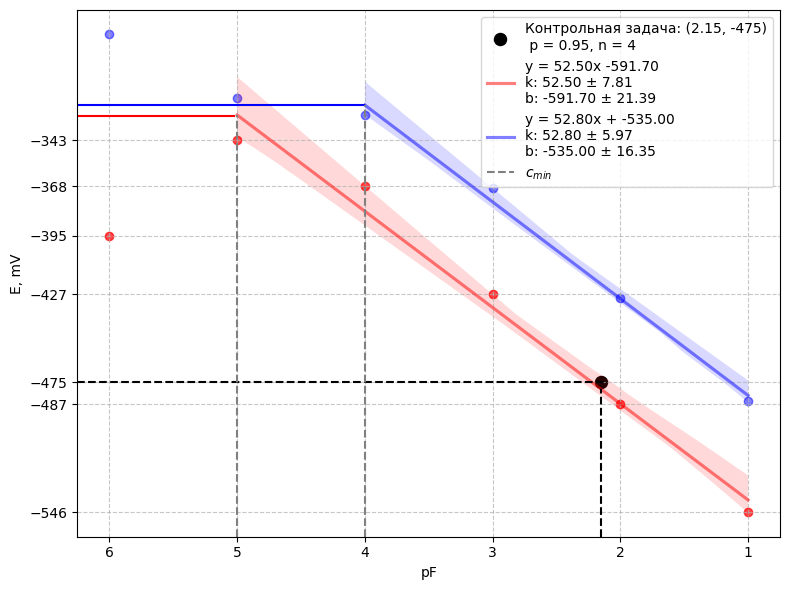

In [ ]:
pF_fit = pF[2:]
E_fit = E[1:]
E_ions_fit = E_ions[2:]

# Контрольная задача
pFx = -np.log10(7 * 10**-3)
Ex = -475

slope, intercept, r_value, p_value, std_err = linregress(pF[1:6], E[1:6])
conf_int_k = 1.96 * std_err
conf_int_b = 1.96 * std_err * np.sqrt(np.mean(pF_fit**2))

slope_ions, intercept_ions, r_value_ions, p_value_ions, std_err_ions = linregress(pF_fit, E_ions_fit)
conf_int_k_ions = 1.96 * std_err_ions
conf_int_b_ions = 1.96 * std_err_ions * np.sqrt(np.mean(pF_fit**2))

plt.figure(figsize=(8, 6))
plt.scatter(pF, E, alpha=0.7, c='red')
plt.scatter(pF, E_ions, c='blue', alpha=0.5)
plt.scatter(pFx, Ex, c='black', s=75, label=(f'Контрольная задача: ({pFx:.2f}, {Ex})\n p = 0.95, n = 4'))

sns.regplot(x=pF[1:6], y=E[1:6], ci=80, label=f'y = {slope:.2f}x {intercept:.2f}\n'
                                           f'k: {slope:.2f} ± {conf_int_k:.2f}\n'
                                           f'b: {intercept:.2f} ± {conf_int_b:.2f}',
            scatter=False, line_kws={'color': 'red', 'alpha': 0.5})

sns.regplot(x=pF_fit, y=E_ions_fit, ci=80, label=f'y = {slope_ions:.2f}x + {intercept_ions:.2f}\n'
                                                f'k: {slope_ions:.2f} ± {conf_int_k_ions:.2f}\n'
                                                f'b: {intercept_ions:.2f} ± {conf_int_b_ions:.2f}',
            scatter=False, line_kws={'color': 'blue', 'alpha': 0.5})

plt.axhline(y = -330, xmax = 1/4.5, c = 'red')
plt.axvline(x = pFx, ymax = 0.28, c = 'black', ls = '--')
plt.axhline(y = Ex, xmax = 3/4, c = 'black', ls = '--')
plt.axhline(y = -324, xmax = 1/2.45, c = 'blue')
plt.axvline(x = 4, ymax=0.82, c = 'grey', ls = '--', label = '$c_{min}$')
plt.axvline(x = 5, ymax=0.8, c = 'grey', ls = '--')
last_point_pF = pF_fit[-1]
plt.gca().invert_xaxis()

plt.yticks(np.append(E, Ex))
plt.xlabel('pF')
plt.ylabel('E, mV')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()